In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster

import seaborn as sns
import pysal as ps
import geopandas as gpd


In [51]:
def clean_mta(df):
    df['interval'] = pd.to_datetime(df['datetime']).dt.hour
    df['ride_type'] = 'mta'
    columns = df.columns
    repeats = df['new_entries'].values
    df = pd.DataFrame(np.repeat(df.values, repeats, axis=0))
    df.columns = columns    
    return df[['ride_type','interval','latitude','longitude']]
mta = pd.read_csv(r'D:\DS4A\Transportation\mta_trips.csv', nrows=500)
mta = clean_mta(mta)

In [23]:
df = pd.read_csv(r'D:\DS4A\Transportation\uber_trips_2014.csv')
df = df.head(500)
del df['base']

In [24]:
df.head(20)

,pickup_datetime,pickup_latitude,pickup_longitude
0,4/1/14 0:11,40.7690,-73.9549
1,4/1/14 0:17,40.7267,-74.0345
2,4/1/14 0:21,40.7316,-73.9873
3,4/1/14 0:28,40.7588,-73.9776
4,4/1/14 0:33,40.7594,-73.9722
5,4/1/14 0:33,40.7383,-74.0403
6,4/1/14 0:39,40.7223,-73.9887
7,4/1/14 0:45,40.7620,-73.9790
8,4/1/14 0:55,40.7524,-73.9960
9,4/1/14 1:01,40.7575,-73.9846


In [25]:
df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
#df['interval'] = df['hour']//4

In [27]:
df = df[['pickup_latitude', 'pickup_longitude', 'hour']]

,pickup_latitude,pickup_longitude,hour
0,40.7690,-73.9549,0
1,40.7267,-74.0345,0
2,40.7316,-73.9873,0
3,40.7588,-73.9776,0
4,40.7594,-73.9722,0


In [29]:
X = df.to_numpy()

array([[ 40.769 , -73.9549,   0.    ],
       [ 40.7267, -74.0345,   0.    ],
       [ 40.7316, -73.9873,   0.    ],
       ...,
       [ 40.7593, -73.9745,  15.    ],
       [ 40.7284, -74.0071,  15.    ],
       [ 40.7079, -74.0093,  15.    ]])

Clustering

In [40]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

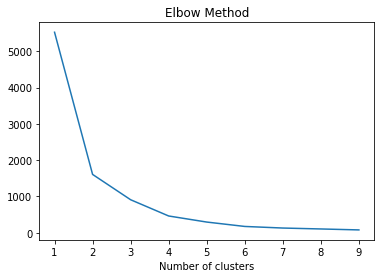

In [31]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

In [48]:
km = KMeans(n_clusters=2, init='k-means++', random_state=42) # initialize
km.fit(X)
c = km.predict(X) # classify into 2 clusters


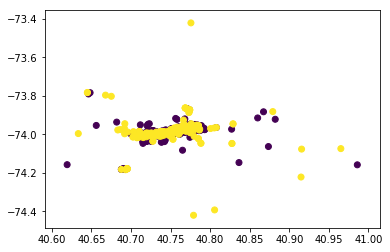

In [49]:
plt.scatter(x = X[:,0], y = X[:,1], c=c)
plt.show()
